# Fancy Plots in R
First we need to read the Markov chain we just generated in Python into R.

In [8]:
myData <- read.csv("myMC.csv")  # read csv file 
summary(myData)

 Jan    Feb    Mar    Apr    May    June   July   Aug    Sept   Oct    Nov   
 C:39   C:45   C:42   C:39   C:42   C:42   C:41   C:41   C:39   C:39   C:44  
 R:25   R:14   R:14   R:13   R:10   R:14   R:15   R:14   R:17   R:19   R:13  
 S:36   S:41   S:44   S:48   S:48   S:44   S:44   S:45   S:44   S:42   S:43  
 Dec   
 C:38  
 R:13  
 S:49  

## Alluvial Plot
Make an alluvial plot with the data.

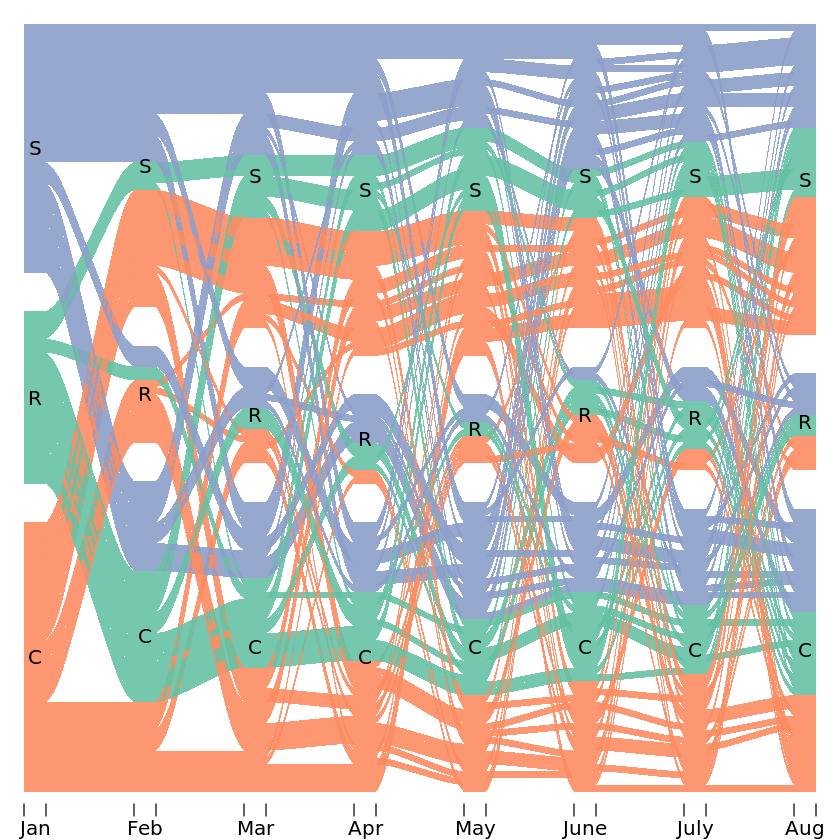

In [9]:
###########
# only run the line below the first time you run this code
#install.packages('alluvial')
############

#library(MASS)
#library(vcd)
library(alluvial)
library(RColorBrewer)

myGrid <- brewer.pal(3,"Set2")

#myCols <- brewer.pal(3,"Set1")

#myCols <- brewer.pal(9,"Set1")
#myGrid = c(rainy = myCols[2], cloudy = myCols[9], sunny = myCols[6])
#myCols <- brewer.pal(8,"Set2")
#myGrid = c(rainy = myCols[3], cloudy = myCols[8], sunny = myCols[6])
alluvial(myData[,1:8], freq=1, col=ifelse(myData$Jan=='R', myGrid[1],
			     ifelse(myData$Jan=='C', myGrid[2],
			     ifelse(myData$Jan=='S', myGrid[3],myGrid[4]))),
                 alpha=0.9, gap.width=0.1, blocks=FALSE, border=NA)

## Mosaic Plot

        col.vars
row.vars rainy cloudy sunny
  rainy    0.6    0.2   0.5
  cloudy   0.3    0.4   0.2
  sunny    0.1    0.4   0.3

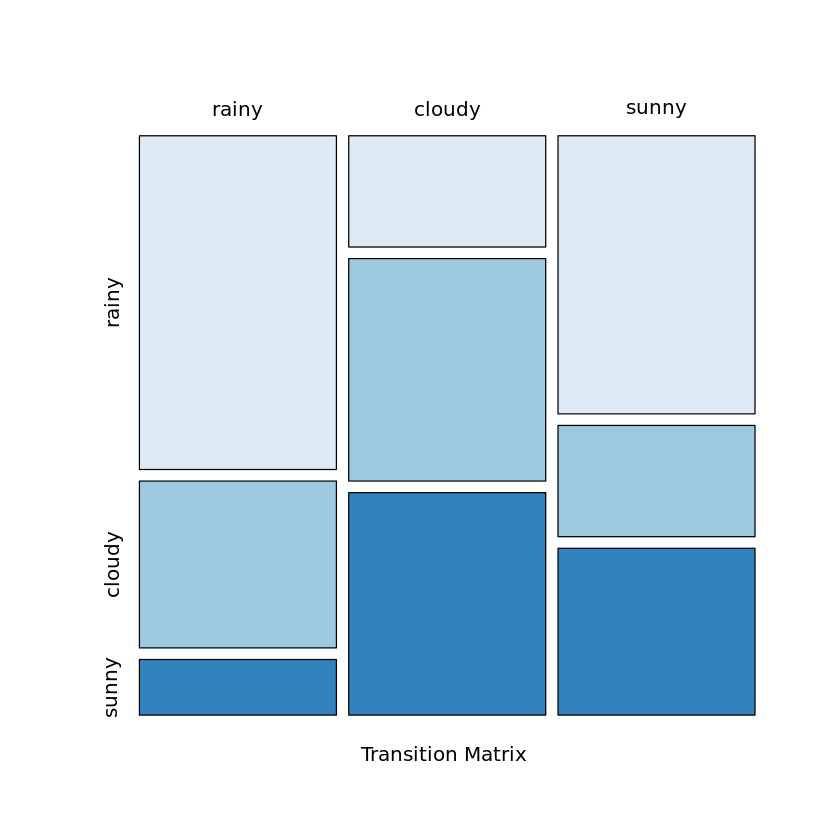

In [10]:
myLabels = c('rainy','cloudy','sunny')
myLabels <- factor(myLabels, levels=c('rainy','cloudy','sunny'), ordered=TRUE)
mTab = table(row.vars = myLabels ,
           col.vars = myLabels )

mTab[1,1]=.6
mTab[2,1]=.3
mTab[3,1]=.1
mTab[1,2]=.2
mTab[2,2]=.4
mTab[3,2]=.4
mTab[1,3]=.5
mTab[2,3]=.2
mTab[3,3]=.3
mTab

myGrid <- brewer.pal(3,"Blues")
#myCols <- brewer.pal(9,"Set1")
#myGrid = c(rainy = myCols[2], cloudy = myCols[9], sunny = myCols[6])
#myCols <- brewer.pal(8,"Set2")
#myGrid = c(rainy = myCols[3], cloudy = myCols[8], sunny = myCols[6])
mosaicplot(t(mTab),xlab="Transition Matrix",ylab="",
           main=NULL,color = myGrid,cex.axis=1)


## Chord Diagram

also installing the dependencies ‘GlobalOptions’, ‘shape’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
circlize version 0.4.4
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: http://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization 
  in R. Bioinformatics 2014.



from   to     value
1 rainy  rainy  0.6  
2 cloudy rainy  0.3  
3 sunny  rainy  0.1  
4 rainy  cloudy 0.2  
5 cloudy cloudy 0.4  
6 sunny  cloudy 0.4  
7 rainy  sunny  0.5  
8 cloudy sunny  0.2  
9 sunny  sunny  0.3

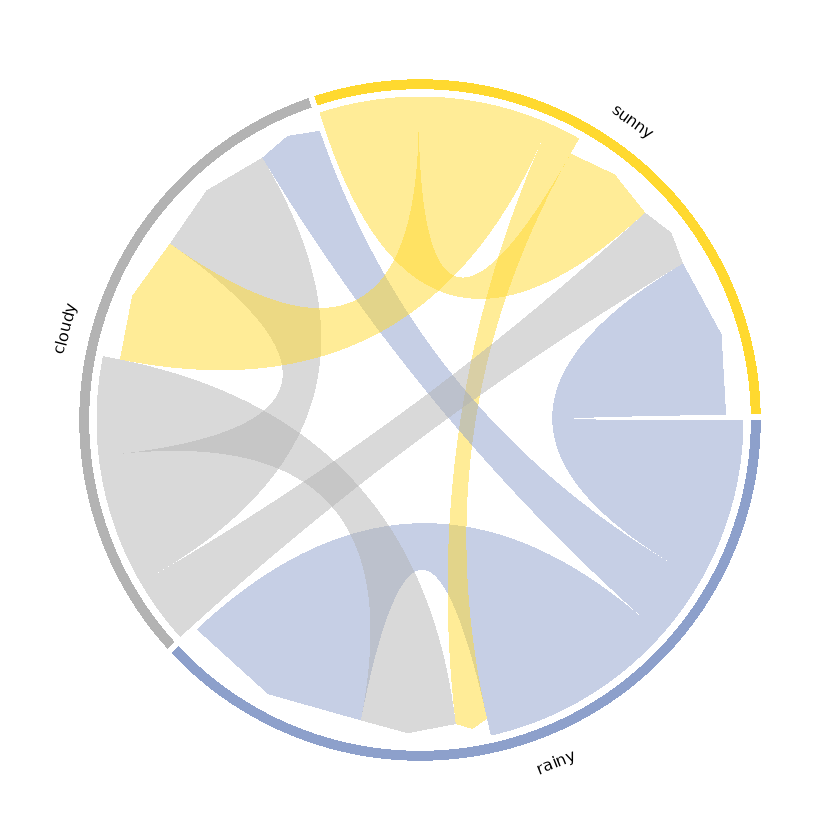

In [12]:
# only run the line below the first time you run the code
# install.packages('circlize')
#

library('circlize')
mat = matrix(c(0.6,0.3,0.1,0.2,0.4,0.4,0.5,0.2,0.3), 3, 3) 
rownames(mat) = myLabels
colnames(mat) = myLabels

df = data.frame(from = rep(rownames(mat), times = ncol(mat)),
    to = rep(colnames(mat), each = nrow(mat)),
    value = as.vector(mat),
    stringsAsFactors = FALSE)
df
#chordDiagram(mat)
#myCols <- brewer.pal(9,"Set1")
#myGrid = c(rainy = myCols[2], cloudy = myCols[9], sunny = myCols[6])
myCols <- brewer.pal(8,"Set2")
myGrid = c(rainy = myCols[3], cloudy = myCols[8], sunny = myCols[6])

chordDiagram(df,grid.col = myGrid, col=myGrid, directional = 1,
             direction.type = c("diffHeight", "arrows"), 
             link.arr.type = "big.arrow",
             diffHeight = -uh(2, "mm"), 
             annotationTrack = c("name", "grid"))
